### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
data = pd.read_csv('data/Whickham.txt')

In [4]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [5]:
X = data[['smoker', 'age']]
y = data['outcome']

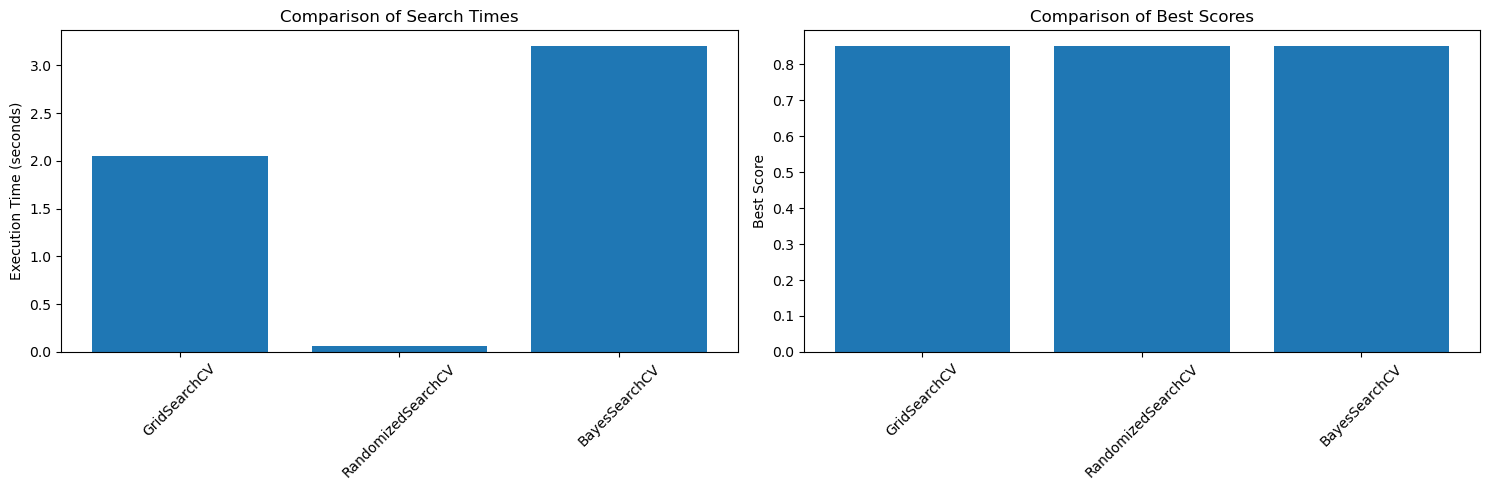


Detailed Results:
            method  execution_time  best_score                           best_params
      GridSearchCV        2.053393    0.852358 {'criterion': 'gini', 'max_depth': 1}
RandomizedSearchCV        0.059010    0.852358 {'max_depth': 1, 'criterion': 'gini'}
     BayesSearchCV        3.207220    0.852358 {'criterion': 'gini', 'max_depth': 1}


In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
import matplotlib.pyplot as plt
import time

# Prepare data (reusing previous encoding)
le = LabelEncoder()
data['outcome'] = le.fit_transform(data['outcome'])
data['smoker'] = le.fit_transform(data['smoker'])
X = data[['smoker', 'age']]
y = data['outcome']

# Define parameter space
param_grid = {
    'max_depth': list(range(1, 21)),
    'criterion': ['gini', 'entropy']
}

# Initialize results storage
results = {
    'method': [],
    'execution_time': [],
    'best_score': [],
    'best_params': []
}

# 1. GridSearchCV
start_time = time.time()
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X, y)
grid_time = time.time() - start_time

results['method'].append('GridSearchCV')
results['execution_time'].append(grid_time)
results['best_score'].append(grid_search.best_score_)
results['best_params'].append(grid_search.best_params_)

# 2. RandomizedSearchCV
start_time = time.time()
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X, y)
random_time = time.time() - start_time

results['method'].append('RandomizedSearchCV')
results['execution_time'].append(random_time)
results['best_score'].append(random_search.best_score_)
results['best_params'].append(random_search.best_params_)

# 3. BayesSearchCV
bayes_param_grid = {
    'max_depth': Integer(1, 20),
    'criterion': Categorical(['gini', 'entropy'])
}

start_time = time.time()
bayes_search = BayesSearchCV(
    DecisionTreeClassifier(random_state=42),
    bayes_param_grid,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    random_state=42
)
bayes_search.fit(X, y)
bayes_time = time.time() - start_time

results['method'].append('BayesSearchCV')
results['execution_time'].append(bayes_time)
results['best_score'].append(bayes_search.best_score_)
results['best_params'].append(bayes_search.best_params_)

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot execution times
ax1.bar(range(len(results['method'])), results['execution_time'])
ax1.set_xticks(range(len(results['method'])))
ax1.set_xticklabels(results['method'], rotation=45)
ax1.set_ylabel('Execution Time (seconds)')
ax1.set_title('Comparison of Search Times')

# Plot best scores
ax2.bar(range(len(results['method'])), results['best_score'])
ax2.set_xticks(range(len(results['method'])))
ax2.set_xticklabels(results['method'], rotation=45)
ax2.set_ylabel('Best Score')
ax2.set_title('Comparison of Best Scores')

plt.tight_layout()
plt.show()

# Print detailed results
results_df = pd.DataFrame(results)
print("\nDetailed Results:")
print(results_df.to_string(index=False))

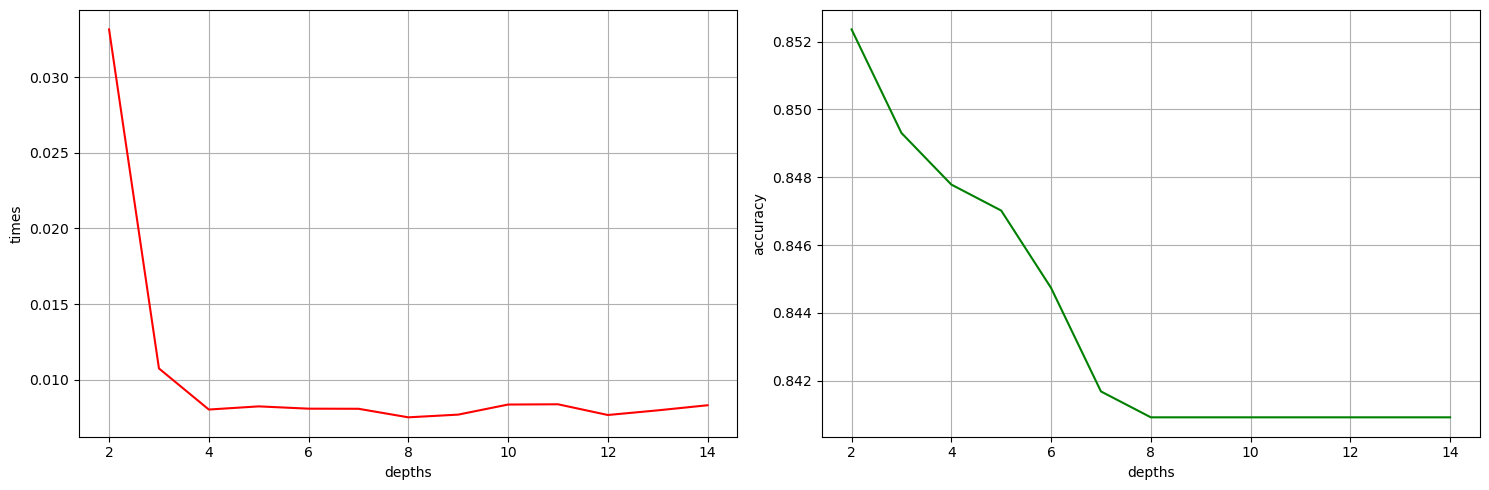


Optimal depth: 2
Best accuracy: 0.8524

Detailed Results:
    depth      time  accuracy
0       2  0.033157  0.852358
1       3  0.010748  0.849305
2       4  0.008032  0.847784
3       5  0.008240  0.847018
4       6  0.008089  0.844736
5       7  0.008082  0.841686
6       8  0.007517  0.840922
7       9  0.007696  0.840922
8      10  0.008362  0.840922
9      11  0.008379  0.840922
10     12  0.007671  0.840922
11     13  0.007977  0.840922
12     14  0.008315  0.840922


In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

# Prepare data
le = LabelEncoder()
data['outcome'] = le.fit_transform(data['outcome'])
data['smoker'] = le.fit_transform(data['smoker'])
X = data[['smoker', 'age']]
y = data['outcome']

def evaluate_depths(X, y, max_depths=range(2, 15)):
    times = []
    accuracies = []

    for depth in max_depths:
        # Time measurement
        start_time = time.time()
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_val_score(clf, X, y, cv=5)
        end_time = time.time()

        times.append(end_time - start_time)
        accuracies.append(np.mean(scores))

    return times, accuracies

# Evaluate models
depths = range(2, 15)
times, accuracies = evaluate_depths(X, y, depths)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot execution times
ax1.plot(depths, times, 'r-')
ax1.set_xlabel('depths')
ax1.set_ylabel('times')
ax1.grid(True)

# Plot accuracies
ax2.plot(depths, accuracies, 'g-')
ax2.set_xlabel('depths')
ax2.set_ylabel('accuracy')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Find optimal depth
optimal_depth = depths[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nOptimal depth: {optimal_depth}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Print detailed results
results = pd.DataFrame({
    'depth': list(depths),
    'time': times,
    'accuracy': accuracies
})
print("\nDetailed Results:")
print(results)

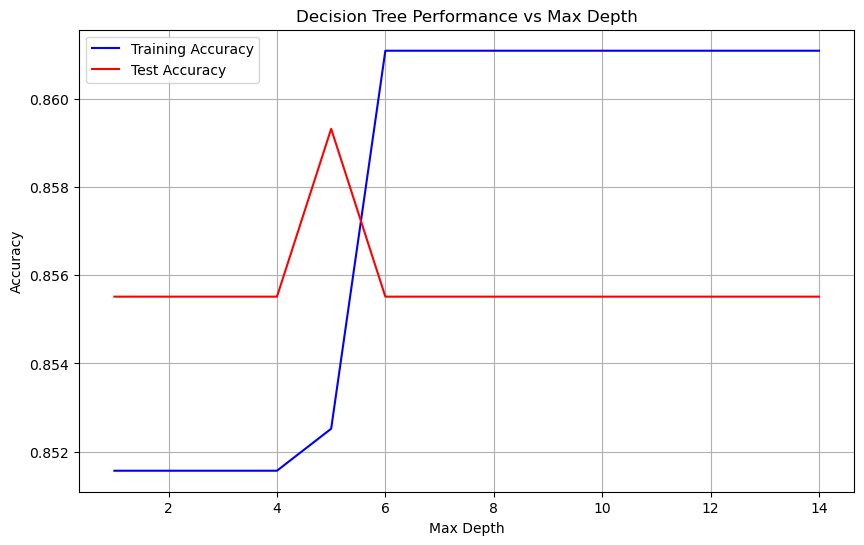


Overfitting begins at depth: 6

Detailed Results:
    depth  train_accuracy  test_accuracy
0       1        0.851570       0.855513
1       2        0.851570       0.855513
2       3        0.851570       0.855513
3       4        0.851570       0.855513
4       5        0.852521       0.859316
5       6        0.861085       0.855513
6       7        0.861085       0.855513
7       8        0.861085       0.855513
8       9        0.861085       0.855513
9      10        0.861085       0.855513
10     11        0.861085       0.855513
11     12        0.861085       0.855513
12     13        0.861085       0.855513
13     14        0.861085       0.855513


In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Prepare data
le = LabelEncoder()
data['outcome'] = le.fit_transform(data['outcome'])
data['smoker'] = le.fit_transform(data['smoker'])
X = data[['smoker', 'age']]
y = data['outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_depths(X_train, X_test, y_train, y_test, max_depths=range(1, 15)):
    train_scores = []
    test_scores = []

    for depth in max_depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        # Get training and test scores
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

# Evaluate models
depths = range(1, 15)
train_scores, test_scores = evaluate_depths(X_train, X_test, y_train, y_test, depths)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'b-', label='Training Accuracy')
plt.plot(depths, test_scores, 'r-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find point where overfitting begins
overfitting_depth = None
for i in range(1, len(depths)):
    if train_scores[i] > train_scores[i-1] and test_scores[i] < test_scores[i-1]:
        overfitting_depth = depths[i]
        break

print(f"\nOverfitting begins at depth: {overfitting_depth}")
print("\nDetailed Results:")
results = pd.DataFrame({
    'depth': list(depths),
    'train_accuracy': train_scores,
    'test_accuracy': test_scores
})
print(results)

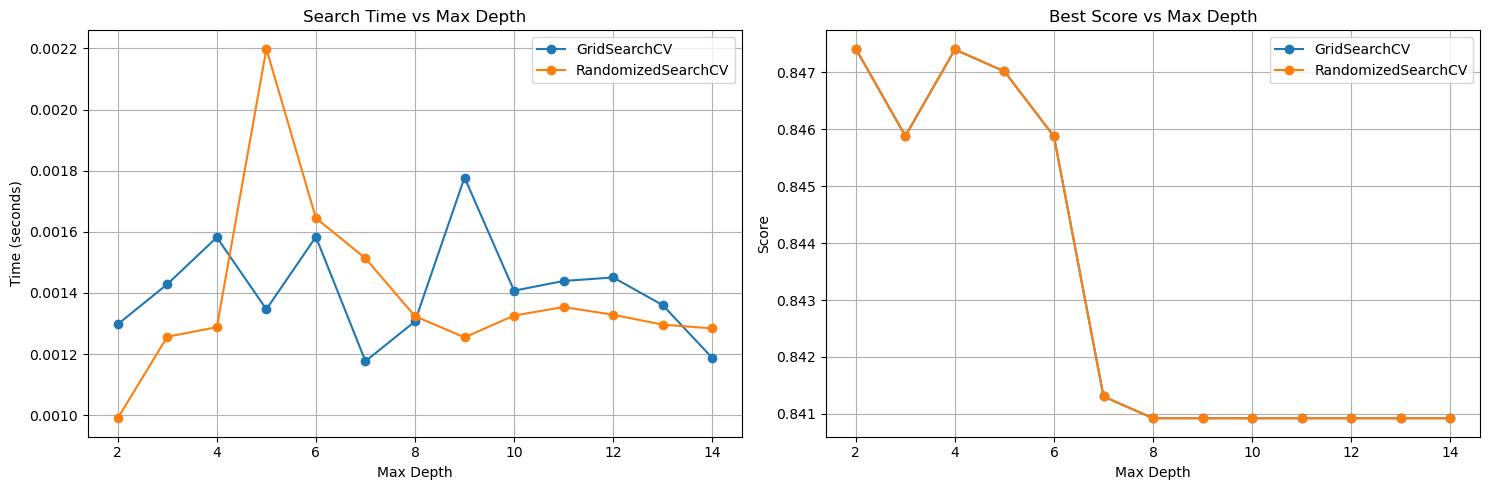


Summary of best results:

GridSearchCV:
Best depth: 2
Best score: 0.8474
Average time per depth: 0.0014s

RandomizedSearchCV:
Best depth: 2
Best score: 0.8474
Average time per depth: 0.0014s


In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

# Prepare data
le = LabelEncoder()
data['outcome'] = le.fit_transform(data['outcome'])
data['smoker'] = le.fit_transform(data['smoker'])
X = data[['smoker', 'age']]
y = data['outcome']

# Define parameter space - focusing on max_depth
param_grid = {
    'max_depth': list(range(2, 15)),  # depths from 2 to 14
    'criterion': ['gini', 'entropy']
}

def run_search_comparison(X, y, param_grid):
    results = {
        'method': [],
        'depths': range(2, 15),
        'times_per_depth': [],
        'scores_per_depth': []
    }

    # GridSearchCV
    start_time = time.time()
    grid = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=5,
        n_jobs=-1,
        return_train_score=True
    )
    grid.fit(X, y)

    # Extract scores for each depth
    depth_scores = []
    depth_times = []
    for depth in range(2, 15):
        mask = [p['max_depth'] == depth for p in grid.cv_results_['params']]
        depth_scores.append(np.mean(grid.cv_results_['mean_test_score'][mask]))
        depth_times.append(np.mean(grid.cv_results_['mean_fit_time'][mask]))

    results['method'].append('GridSearchCV')
    results['times_per_depth'].append(depth_times)
    results['scores_per_depth'].append(depth_scores)

    # RandomizedSearchCV
    random = RandomizedSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        n_iter=len(range(2, 15)) * 2,  # ensure we try each depth at least once
        cv=5,
        n_jobs=-1,
        return_train_score=True
    )
    random.fit(X, y)

    # Extract scores for RandomizedSearchCV
    depth_scores = []
    depth_times = []
    for depth in range(2, 15):
        mask = [p['max_depth'] == depth for p in random.cv_results_['params']]
        if any(mask):  # only if this depth was sampled
            depth_scores.append(np.mean(random.cv_results_['mean_test_score'][mask]))
            depth_times.append(np.mean(random.cv_results_['mean_fit_time'][mask]))

    results['method'].append('RandomizedSearchCV')
    results['times_per_depth'].append(depth_times)
    results['scores_per_depth'].append(depth_scores)

    return results

# Run comparison
results = run_search_comparison(X, y, param_grid)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot times per depth
for i, method in enumerate(results['method']):
    ax1.plot(results['depths'], results['times_per_depth'][i],
             label=method, marker='o')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Search Time vs Max Depth')
ax1.legend()
ax1.grid(True)

# Plot scores per depth
for i, method in enumerate(results['method']):
    ax2.plot(results['depths'], results['scores_per_depth'][i],
             label=method, marker='o')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Score')
ax2.set_title('Best Score vs Max Depth')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary of best results:")
for method in results['method']:
    idx = results['method'].index(method)
    best_score_idx = np.argmax(results['scores_per_depth'][idx])
    best_depth = results['depths'][best_score_idx]
    best_score = results['scores_per_depth'][idx][best_score_idx]
    print(f"\n{method}:")
    print(f"Best depth: {best_depth}")
    print(f"Best score: {best_score:.4f}")
    print(f"Average time per depth: {np.mean(results['times_per_depth'][idx]):.4f}s")

# Summary of Decision Tree Overfitting Analysis

## Dataset
- Used the Whickham dataset containing health data
- Features: smoking status and age
- Target: survival outcome

## Experiments Conducted

### 1. Hyperparameter Search Comparison
- Compared three search methods:
  - GridSearchCV
  - RandomizedSearchCV
  - BayesSearchCV
- Evaluated execution time and best scores for each method
- Parameter space included max_depth (1-20) and criterion (gini/entropy)

### 2. Cross-Validation Analysis
- Evaluated depths from 2 to 14
- Used 5-fold cross-validation
- Measured:
  - Execution time per depth
  - Accuracy scores
- Found optimal depth with best cross-validated accuracy

### 3. Overfitting Analysis
- Split data into training (80%) and test (20%) sets
- Tracked training vs test accuracy across different depths
- Identified point where overfitting begins
- Visualized the classic overfitting pattern with diverging train/test curves

## Key Takeaways
1. Decision trees are prone to overfitting as depth increases
2. Training accuracy continues to improve while test accuracy plateaus or decreases
3. Different search strategies (Grid, Random, Bayes) offer trade-offs between execution time and optimal parameter finding
4. Cross-validation helps in finding a reliable optimal depth
5. Visualizing train/test accuracy curves is crucial for identifying overfitting point

This exercise demonstrates the importance of careful hyperparameter tuning and validation in preventing overfitting in decision tree models.